## Import Libraries

In [12]:
import os
import glob
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = os.listdir('Dataset\\Training')
print (dataset_path)  #what kinds of classes are in this dataset
print("Types of classes labels found: ", len(dataset_path))

['glioma', 'meningioma', 'notumor', 'pituitary']
Types of classes labels found:  4


## Build Dataframe

In [3]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('Dataset\\Training' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

   Labels                                 image
0  glioma  dataset_path/glioma/Tr-glTr_0000.jpg
1  glioma  dataset_path/glioma/Tr-glTr_0001.jpg
2  glioma  dataset_path/glioma/Tr-glTr_0002.jpg
3  glioma  dataset_path/glioma/Tr-glTr_0003.jpg
4  glioma  dataset_path/glioma/Tr-glTr_0004.jpg
         Labels                                  image
5707  pituitary  dataset_path/pituitary/Tr-pi_1452.jpg
5708  pituitary  dataset_path/pituitary/Tr-pi_1453.jpg
5709  pituitary  dataset_path/pituitary/Tr-pi_1454.jpg
5710  pituitary  dataset_path/pituitary/Tr-pi_1455.jpg
5711  pituitary  dataset_path/pituitary/Tr-pi_1456.jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  5712
Labels
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64


In [16]:
path_to_notumor = 'Dataset\\Training\\notumor\\*.jpg'
path_to_pituitary = 'Dataset\\Training\\pituitary\\*.jpg'
path_to_meningioma = 'Dataset\\Training\\meningioma\\*.jpg'
path_to_glioma = 'Dataset\\Training\\glioma\\*.jpg'

imgs_in_notumor = glob.glob(path_to_notumor)
notumor_imgs = []
for img in imgs_in_notumor:
    notumor_imgs.append(cv.imread(img))

imgs_in_pituitary = glob.glob(path_to_pituitary)
pituitary_imgs = []
for img in imgs_in_pituitary:
    pituitary_imgs.append(cv.imread(img))

imgs_in_meningioma = glob.glob(path_to_meningioma)
meningioma_imgs = []
for img in imgs_in_meningioma:
    meningioma_imgs.append(cv.imread(img))

imgs_in_glioma = glob.glob(path_to_glioma)
glioma_imgs = []
for img in imgs_in_glioma:
    glioma_imgs.append(cv.imread(img))

In [20]:
print(len(notumor_imgs), len(pituitary_imgs), len(meningioma_imgs), len(glioma_imgs))

1595 1457 1339 1321


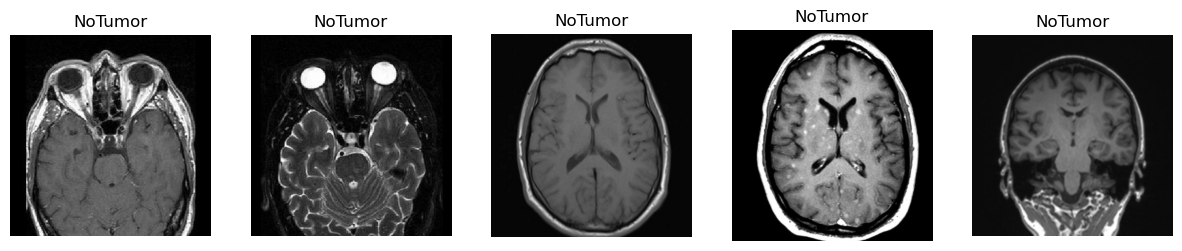

In [21]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = notumor_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("NoTumor")
    plt.axis('off')
plt.show()

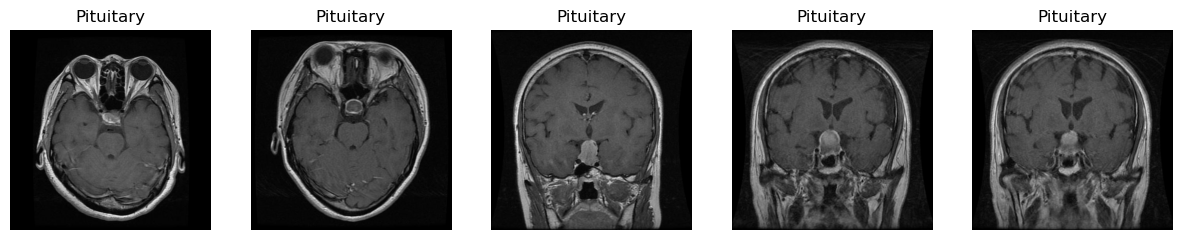

In [22]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = pituitary_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Pituitary")
    plt.axis('off')
plt.show()

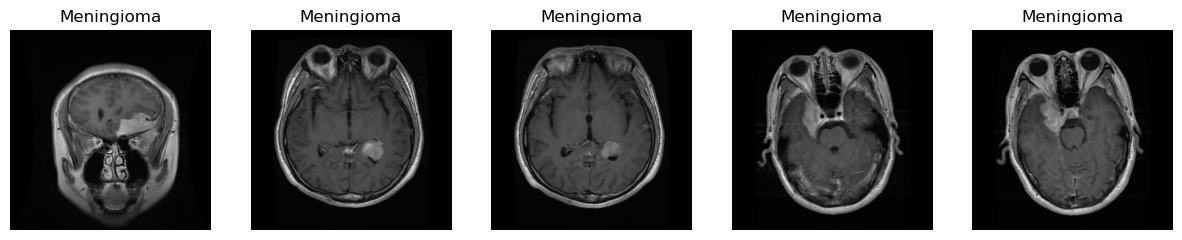

In [23]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = meningioma_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Meningioma")
    plt.axis('off')
plt.show()

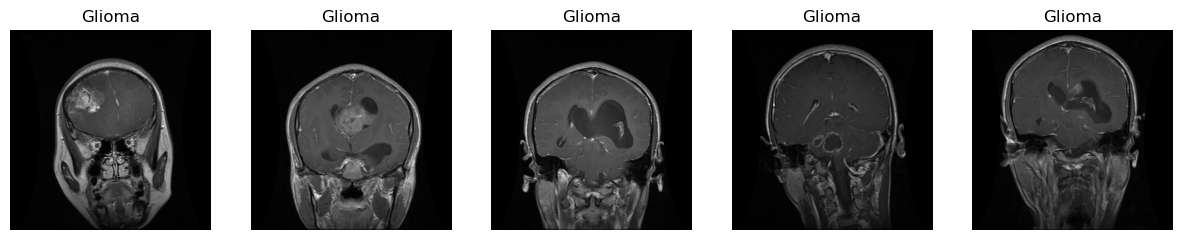

In [24]:
num_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_show):
    img = glioma_imgs[i]
    plt.subplot(1, num_show, i+1)
    plt.imshow(img)
    plt.title("Glioma")
    plt.axis('off')
plt.show()